In [2]:
#data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import os

csv_file_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/vgsales.csv'
g_sales = pd.read_csv(csv_file_path) 
g_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
g_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
g_sales.shape

(16598, 11)

In [6]:
#결측치
print('전체 데이터 건수:', len(g_sales))

print('컬럼별 결측치 개수')
len(g_sales) - g_sales.count()

전체 데이터 건수: 16598
컬럼별 결측치 개수


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
#DataFrame.isnull()은 데이터마다 결측치 여부를 True, False로 반환합니다. 
g_sales.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#DataFrame.any(axis=1)는 행마다 하나라도 True가 있으면 True, 그렇지 않으면 False를 반
g_sales[g_sales.isnull().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [9]:
#temp=g_sales[g_sales.isna().any(axis=1)]
#temp
g_sales[(g_sales['Year'].isnull())]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [11]:
g_sales[(g_sales['Name']=='Virtua Quest')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15652,15655,Virtua Quest,PS2,NaN,Role-Playing,Unknown,0.01,0.01,0.0,0.0,0.02
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.0,0.01


In [12]:
#Publisher null 삭제  ,, 
#16594 - Publisher 58개 제거 = 16540 남았음
g_sales.dropna(how='all', subset=['Publisher'], inplace=True)

In [14]:
#year수정 2개 
g_sales.loc[16307, 'Publisher'] = 'Midway Games'

In [16]:
#year null 삭제  ,, 
#16540 - 246(전체 271, Publisher중복으로 23개 삭제 , 2(year 수정) = 16294개 
g_sales.dropna(how='all', subset=['Year'], inplace=True)

In [17]:
#중복data  는 없음
g_sales.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16291, dtype: bool

In [18]:
#중복data  는 없음
g_sales[g_sales.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [19]:
#이상치 함수 생성
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

In [58]:
#Global_Sales  이상치를 확인: 2 기준으로 이상치 확인 , 
# Global_Sales 이상치: 338개
# EU_Sales     이상치 : 358개 
# JP_Sales     이상치: 383개 
# NA_Sales     이상치: 352개
# Other_Sales  이상치: 292개
g_sales.loc[outlier(g_sales, 'Global_Sales', 2)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
333,334,Spyro: Year of the Dragon,PS,2000.0,Platform,Sony Computer Entertainment,1.93,1.58,0.00,0.19,3.71
334,335,FIFA Soccer 2005,PS2,2004.0,Sports,Electronic Arts,0.58,2.48,0.04,0.59,3.70
335,336,Pokémon Trading Card Game,GB,1998.0,Strategy,Nintendo,1.49,0.73,1.38,0.10,3.70
336,337,Battlefield 4,PS3,2013.0,Shooter,Electronic Arts,1.30,1.51,0.27,0.61,3.69


In [20]:
## Standardization 기법으로 정규화합니다. 
cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
g_sales_Standardization= (g_sales[cols]-g_sales[cols].mean())/g_sales[cols].std()
g_sales_Standardization.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,50.124931,56.689775,11.835234,44.252142,52.444813
1,35.035540,6.739150,21.582588,3.796102,25.328886
2,18.949106,24.999402,11.899361,17.158695,22.508829
3,18.827515,21.327717,10.264115,15.317393,20.709608
4,13.380257,17.165165,32.516298,5.006100,19.669632


In [21]:
#standag_sales_Standardizationrdization 방법으로 정규화시킨 trade_Standardization을 확인
g_sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


KeyboardInterrupt: 

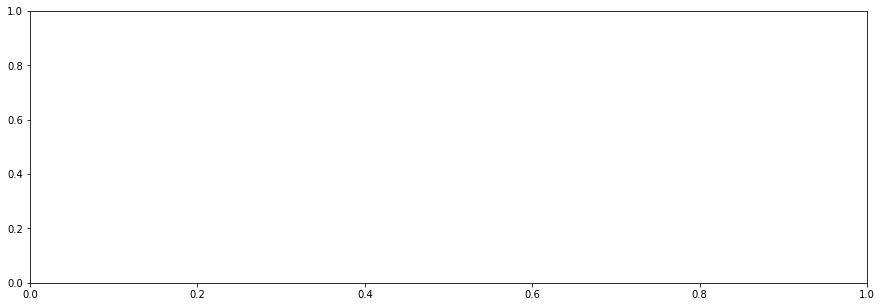

In [29]:
# 그래프 데이터 

graph_x = g_sales['Year'] 
graph_y = g_sales['Global_Sales'] 


#fig = plt.figure()             
#ax = fig.add_subplot(1,1,1)     

plt.figure(figsize=(15,5))
# 눈금 
#plt.plot(graph_x, graph_y)  
plt.bar(graph_x, graph_y)  
#plt.ylim([100, 500])                          
#plt.xlim(['2020-09-01','2022-09-02'])

#ax.bar(price[0],price[1])


# 라벨, 타이틀 달기
plt.xlabel('DATE')
plt.ylabel('Global_Sales')
plt.title("Game sales")

# 보여주기
#plt.savefig('./barplot.png')  # 그래프를 이미지로 출력
plt.show()                    # 그래프를 화면으로 출력